# 19 • Análisis de texto

En este notebook se revisará distintas formas de realizar análisis de texto (básico) con Python.

## Contenido
1. N-grams
2. Sentiment analysis
3. Wordcloud
4. Referencias  

In [1]:
# load libraries
## basic libraries
import pandas as pd
import numpy as np

## librería spaCy
import spacy
nlp = spacy.load("es_core_news_sm")

# Para eliminar stopwords
import nltk

# Para n-grams
import itertools
from collections import Counter

# Para visualización usaré Altair
import altair as alt
alt.renderers.enable('mimetype') #<-Este nos sirve para ver las gráficas en GitHub

RendererRegistry.enable('mimetype')

## 1. N-grams

In [2]:
# funcion para generar los n-grams
def n_gram(tokens,n):
    return[tokens[i:i+n] for i in range(len(tokens)-n+1)]

### Ejemplo con *bigrams* de caracteres

In [84]:
texto_1 = 'Me llegó un email al correo leo234@gmail.com que dice: "OMG! El señor Carlos rompió el control del televisor hoy y tuve que \
comprar otro en www.amazon.com.mx".'

In [86]:
# obtener el n-grams de tamaño 2
ejem_1 = Counter(zip(texto_1, itertools.islice(texto_1, 1, None)))

# hacer un dataframe para poder graficarlo
my_cols = [str(i) for i in ejem_1.keys()]
source = pd.DataFrame(ejem_1.values(), index=ejem_1.keys()).reset_index().rename(columns={"level_0":"chr_1", "level_1":"chr_2", 0:"frecuencia"})
source["bigram"] = source["chr_1"] + source["chr_2"]
source.head(10)

,chr_1,chr_2,frecuencia,bigram
0,M,e,1,Me
1,e,,4,e
2,,l,2,l
3,l,l,1,ll
4,l,e,3,le
5,e,g,1,eg
6,g,ó,1,gó
7,ó,,2,ó
8,,u,1,u
9,u,n,1,un


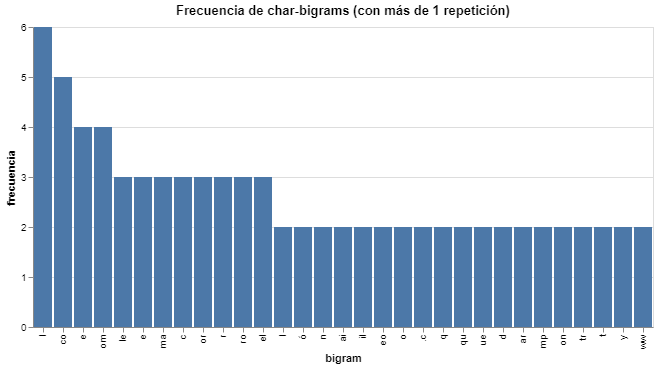

In [87]:
# plot
alt.Chart(source[source.frecuencia>1]).mark_bar().encode(
    alt.X("bigram",sort="-y"),
    y="frecuencia",
    tooltip=["bigram","chr_1","chr_2","frecuencia"]
).properties(
    title="Frecuencia de char-bigrams (con más de 1 repetición)"
)

### Ejemplo con *bigrams* de tokens (palabras o cadenas de caracteres)

In [92]:
# Mini-preproceso

## función para eliminar stopwords
def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('spanish')
    output= [i for i in text if i not in stopwords]
    return output

## función de preproceso sencillo
def preproceso(texto):
    ## En minúsculas
    texto = texto.lower()
    ## Tokenization
    tokens = texto.rsplit()
    ## Eliminar Stopwords
    #tokens = remove_stopwords(tokens)
    return tokens

In [98]:
# Canción "Tití me preguntó" de Bad Bunny, link: https://www.letras.com/bad-bunny/titi-me-pregunto/
texto_2 = '''Ey, Tití me preguntó
Si tengo muchas novia'
Muchas novia'
Hoy tengo a una, mañana otra
Ey, pero no hay boda
Tití me preguntó
Si tengo muchas novia'
Je, muchas novia'
Hoy tengo a una, mañana otra
Me la' vo'a llevar a to'a
Pa' un VIP, un VIP, ey
Saluden a Tití
Vamo' a tirarno' un selfie
Say "Cheese", ey
Que sonrían las que ya les metí
En un VIP, un VIP, ey
Saluden a Tití
Vamo' a tirarno' un selfie
Say "Cheese"
Que sonrían las que ya se olvidaron de mí
Me gustan mucho las Gabriela
Las Patricia, las Nicolle, las Sofía
Mi primera novia en kinder, María
Y mi primer amor se llamaba Thalía
Tengo una colombiana
Que me escribe to' los día'
Y una mexicana que ni yo sabía
Otra en San Antonio que me quiere todavía
Y las de PR que todita' son mía'
Una dominicana que es uva bombón
Uva, uva bombón
La de Barcelona que vino en avión
Y dice que mi bicho está cabrón
Yo dejo que jueguen
Con mi corazón
Quisiera mudarme
Con todas pa' una mansión
El día que me case te envío la invitación
Muchacho, deja eso, ey
Tití me preguntó
Si tengo muchas novia', muchas novia'
Hoy tengo a una, mañana otra
Ey, pero no hay boda
Tití me preguntó
Si tengo muchas novia'
Ey, ey, muchas novia'
Hoy tengo a una, mañana otra (mañana otra) (rrra)
Tití me preguntó-tó-tó-tó-tó-tó-tó
Tití me preguntó-tó-tó-tó-tó-tó-tó (qué pámpara)
Tití me preguntó-tó-tó-tó-tó-tó-tó
Tití me preguntó-tó-tó-tó
(Pero ven acá, muchacho
¿Y para qué tú quiere' tanta' novia'?)
Me la' vo'a llevar a to'a
Pa' un VIP, un VIP, ey
Saluden a Tití
Vamo' a tirarno' un selfie
Say "Cheese", ey
Que sonrían las que ya les metí
En un VIP, un VIP, ey
Saluden a Tití
Vamo' a tirarno' un selfie
Say "Cheese"
Que sonrían las que ya se olvidaron de mí
Oye, muchacho 'el diablo, azaroso
Suelta ese mal vivir
Que tú tiene' en la calle
Búscate una mujer seria pa' ti
Muchacho 'el diablo, coño
Yo quisiera enamorarme
Pero no puedo
Pero no puedo, eh, eh
Yo quisiera enamorarme
Pero no puedo
Pero no puedo
Sorry, yo no confío, yo no confío
Nah, ni en mí mismo confío
Si quieres quedarte
Hoy que hace frío
Y mañana te va', nah
Muchas quieren mi baby gravy
Quieren tener mi primogénito, ey
Y llevarse el crédito
Ya me aburrí
Hoy quiero un totito inédito, je
Uno nuevo, uno nuevo, uno nuevo, uno nuevo (ey)
Hazle caso a tu amiga
Ella tiene razón
Yo vo'a romperte el corazón
Vo'a romperte el corazón
Ey, no te enamores de mí
No te enamores de mí
Sorry, yo soy así, ey
No sé por qué soy así
Hazle caso a tu amiga
Ella tiene razón
Yo vo'a romperte el corazón
Vo'a romperte el corazón
No te enamores de mí
No te enamores de mí
Sorry, yo soy así
Ya no quiero ser así, no'''

In [95]:
# aplicar función 'n_gram' al ejemplo 1
tokens_2 = preproceso(texto_2)
my_bigrams = n_gram(tokens_2,2)  #<--Bigrams
print("\nLos primeros 15 bigrams:")
my_bigrams[:15]


Los primeros 15 bigrams:


[['ey,', 'tití'],
 ['tití', 'me'],
 ['me', 'preguntó'],
 ['preguntó', 'si'],
 ['si', 'tengo'],
 ['tengo', 'muchas'],
 ['muchas', "novia'"],
 ["novia'", 'muchas'],
 ['muchas', "novia'"],
 ["novia'", 'hoy'],
 ['hoy', 'tengo'],
 ['tengo', 'a'],
 ['a', 'una,'],
 ['una,', 'mañana'],
 ['mañana', 'otra']]

In [96]:
# frecuencia de token's bigrams
# df_tokens = pd.DataFrame(Counter(zip(pd.DataFrame(my_bigrams)[0], pd.DataFrame(my_bigrams)[1])))
bigram_freq = Counter(zip(pd.DataFrame(my_bigrams)[0], pd.DataFrame(my_bigrams)[1]))

# hacer un dataframe para poder graficarlo
# my_cols = [str(i) for i in bigram_freq.keys()]
# bigram_freq.values()
source = pd.DataFrame(bigram_freq.values(), index=bigram_freq.keys()).reset_index().rename(columns={"level_0":"token_1", "level_1":"token_2", 0:"frecuencia"})
source["bigram"] = source["token_1"] + " " + source["token_2"]
source


,token_1,token_2,frecuencia,bigram
0,"ey,",tití,1,"ey, tití"
1,tití,me,8,tití me
2,me,preguntó,4,me preguntó
3,preguntó,si,4,preguntó si
4,si,tengo,4,si tengo
...,...,...,...,...
308,ya,no,1,ya no
309,no,quiero,1,no quiero
310,quiero,ser,1,quiero ser
311,ser,"así,",1,"ser así,"


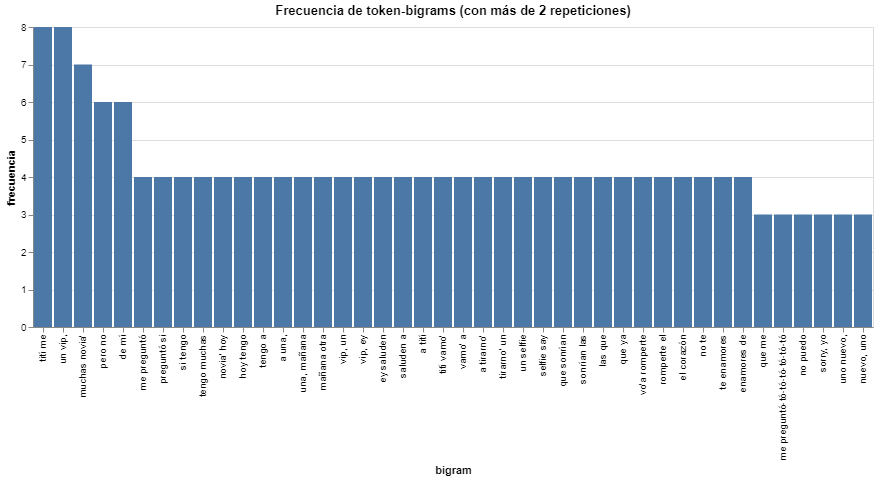

In [97]:
# plot
alt.Chart(source[source.frecuencia>2]).mark_bar().encode(
    alt.X("bigram",sort="-y"),
    y="frecuencia",
    tooltip=["bigram","token_1","token_2","frecuencia"]
).properties(
    title="Frecuencia de token-bigrams (con más de 2 repeticiones)"
)

## 2. Sentiment analysis
TO-DO

In [102]:
from textblob import TextBlob

text = "I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy."
blob = TextBlob(text)

print(blob.sentiment_assessments)

Sentiment(polarity=-0.125, subjectivity=0.9, assessments=[(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)])


In [107]:
# import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# nlp = spacy.load('en_core_web_sm')
# text = "I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy."
texto_3 = "Espera. Aún la nave del olvido no ha partido. No condenemos al naufragio lo vivido. Por nuestro ayer, por nuestro amor, yo te lo pido. Espera. \
Aún me quedan en mis manos primaveras. Para colmarte de caricias todas nuevas. Que morirían en mis manos si te fueras"
nlp = spacy.load("es_core_news_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(texto_3)


In [108]:
print(doc._.blob.polarity)


0.0


In [120]:
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)

blob
# b = TextBlob("hola")
# b.detect_language()

TextBlob("
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
")

In [121]:
blob.tags

[('The', 'DT'),
 ('titular', 'JJ'),
 ('threat', 'NN'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Blob', 'NNP'),
 ('has', 'VBZ'),
 ('always', 'RB'),
 ('struck', 'VBN'),
 ('me', 'PRP'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('movie', 'NN'),
 ('monster', 'NN'),
 ('an', 'DT'),
 ('insatiably', 'RB'),
 ('hungry', 'JJ'),
 ('amoeba-like', 'JJ'),
 ('mass', 'NN'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('penetrate', 'VB'),
 ('virtually', 'RB'),
 ('any', 'DT'),
 ('safeguard', 'NN'),
 ('capable', 'JJ'),
 ('of', 'IN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('doomed', 'JJ'),
 ('doctor', 'NN'),
 ('chillingly', 'RB'),
 ('describes', 'VBZ'),
 ('it', 'PRP'),
 ('assimilating', 'VBG'),
 ('flesh', 'NN'),
 ('on', 'IN'),
 ('contact', 'NN'),
 ('Snide', 'JJ'),
 ('comparisons', 'NNS'),
 ('to', 'TO'),
 ('gelatin', 'VB'),
 ('be', 'VB'),
 ('damned', 'VBN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('concept', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('devastating', 'JJ'),
 ('of', 'IN'),
 ('potenti

In [122]:
blob.noun_phrases

WordList(['titular threat', 'blob', 'ultimate movie monster', 'amoeba-like mass', 'snide', 'potential consequences', 'grey goo scenario', 'technological theorists fearful', 'artificial intelligence run rampant'])

In [124]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.06000000000000001, subjectivity=0.605)
Sentiment(polarity=-0.34166666666666673, subjectivity=0.7666666666666666)


## 3. Wordcloud
TO-DO

## 4. Referencias
- spaCy's [textblob](https://spacy.io/universe/project/spacy-textblob)
- [SpaCy For Traditional NLP](https://chatbotslife.com/spacy-for-traditional-nlp-c85b5436b21c) por saketh-saraswathi en *Chatbots Life*.